In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib as mt
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

cdict2 = {'red': ((0.0, 0.20, 0.20),
                  (0.2, 0.0, 0.0),
                  (2/3, 0.27, 0.27),
                  (1.0, 0.13, 0.13)),
          'green': ((0.0, 0.16, 0.16),
                    (0.2, 0.0, 0.0),
                    (2/3, 0.65, 0.65),
                    (1.0, 1.0, 1.0)),
          'blue': ((0.0, 0.53, 0.53),
                   (0.2, 1.0, 1.0),
                   (2/3, 0.78, 0.78),
                   (1.0, 1.0, 1.0)),
          }
duration_cmap = LinearSegmentedColormap('duration_cmap', cdict2)
mt.rcParams['font.size'] = 14
mt.rcParams['axes.labelsize'] = 16
mt.rcParams['figure.titlesize'] = 20


def colorbar_legend(labels, colors, cax=None,
                    ax=None, position='right', size=r'5%',
                    pad=r'3%'):
    colors = np.asarray(colors)
    if colors.ndim == 2:
        if colors.shape[1] not in (3, 4) and colors.shape[1] in (3, 4):
            colors = colors.T
        colors = colors[:, None, :]
    elif colors.ndim != 3:
        raise ValueError('Supplied colors must be a 2D or 3D array, whos last '
                         'axis must have 3 or 4 entries, representing red, '
                         'green, blue, and optionally alpha color channels. '
                         'Supplied colors has shape {}.'.format(colors.shape))
    if cax is None:
        if ax is None:
            ax = plt.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes(position, size, pad=pad)
    cax.imshow(colors, origin='lower', aspect='auto',
               extent=[0, 1, -0.5, len(colors) - 0.5])
    cax.set_yticks(range(len(colors)))
    cax.set_yticklabels(labels)
    cax.tick_params(axis='both', direction='inout', labelleft=False,
                    left=False, right=True, labelright=True,
                    bottom=False, labelbottom=False)
    cax.yaxis.set_label_position('right')
    return cax

The structure is the psth response, measured for a bin of 10ms from 400ms before stimulus2 onset till 1000ms after the stimulus2 offset.

Note that increase in the response in the last 400ms is due to the movement of the rat withdrawing from the nose poke.

the number of neurons per category:
<table>
  <tr>
    <th style="text-align: left; border: 1px solid #dddddd">Category</th>
    <th style="border: 1px solid #dddddd">Number of neurons</th>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #dddddd">Significant opto response</td>
    <td style="border: 1px solid #dddddd">54</td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #dddddd">Significant vibration stimulus response</td>
    <td style="border: 1px solid #dddddd">58</td>
  </tr>
  <tr>
    <td style="text-align: left; border: 1px solid #dddddd">Significant both to vibration and light stimulus</td>
    <td style="border: 1px solid #dddddd">14</td>
  </tr>
</table>

These are **single** or **good multi units**

This is an example code to plot category1 neurons in the upper plot for opto on trials and in the lower plot for no light stimulation trials:

```
hold off
for i=1:7
    % plot mean response to stimlus2 when light stimulation is on during
    % the stimulation 
    subplot 211
    stairs(smooth(Reponse{i}.Category1.Light))
    
    hold on
    subplot 212
    % plot mean response to stimlus2 when light stimulation is off 
    stairs(smooth(Reponse{i}.Category1.NOLight))
    hold on
end
```



In [2]:
raw = loadmat('Reponse.mat')
dt = 10.
pre = 400.
delay = 500.
action = 500.
raw

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 13 22:13:04 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Reponse': array([[array([[(array([[(array([[28.1372948 , 23.13345091, 22.94436531, 26.6265319 , 19.90328088,
         20.06596798, 21.44846923, 22.79637544, 18.46035138, 18.20829376,
         25.2607629 , 23.36838059, 19.1659318 , 21.69040836, 27.84142812,
         21.89498259, 21.13982725, 23.71421788, 20.47268575, 24.21375435,
         20.12108262, 21.91991136, 25.35889522, 18.98928232, 20.88070366,
         20.32509158, 24.79565188, 26.18374938, 23.44197983, 21.54462307,
         21.43247185, 20.87883824, 19.12376204, 23.04962013, 20.72892642,
         21.11297653, 22.83639714, 19.93533216, 17.891964  , 29.73313209,
         48.52191019, 45.90761091, 42.84453715, 38.62869127, 32.29904355,
         35.40643513, 33.08743725, 22.77325555, 26.63388052, 33.72450595,
         32.75217067, 33.28901551, 34.03733098, 31.80996473, 37.49231221,
         2

In [3]:
response = raw['Reponse']
categories = {'only_opto': 'Category1',
              'only_mech': 'Category2',
              'opto_mech': 'Category3',
              'unrespons': 'Category4',
              }
light_map = {0: 'NOLight',
             1: 'Light'
            }
T1 = 334.
T2s = np.array([161.0,
                205.0,
                264.0,
                334.0,
                423.0,
                545.0,
                694.0])
data = []
for c, T2 in enumerate(T2s):
    temp = response[0][c]
    for category, n in categories.items():
        temp2 = temp[n][0][0]
        for light, label in light_map.items():
            temp3 = temp2[label][0][0]
            for row in temp3:
                data.append([category, T1, T2, light, row])
df = pd.DataFrame(data=data,
                  columns=['category', 'T1', 'T2', 'light', 'psth'])
df

,category,T1,T2,light,psth
0,only_opto,334.0,161.0,0,"[28.137294803961474, 23.13345091122868, 22.944..."
1,only_opto,334.0,161.0,1,"[15.305480682839175, 20.45822102425877, 18.827..."
2,only_mech,334.0,161.0,0,"[21.84001670843776, 24.09147869674185, 17.1574..."
3,only_mech,334.0,161.0,1,"[16.02148330596606, 15.270251778872472, 13.464..."
4,opto_mech,334.0,161.0,0,"[16.423782156540778, 14.063355227148326, 14.98..."
5,opto_mech,334.0,161.0,1,"[12.429529282977558, 11.8219759168035, 11.8842..."
6,unrespons,334.0,161.0,0,"[12.703201970443349, 14.731116584564868, 12.47..."
7,unrespons,334.0,161.0,1,"[14.149305555555552, 12.988591269841265, 11.23..."
8,only_opto,334.0,205.0,0,"[26.992945326278665, 23.15917107583774, 20.061..."
9,only_opto,334.0,205.0,1,"[21.048981882315218, 23.399470899470902, 16.05..."


In [4]:
def get_M(df):
    return max((len(p) for p in df.psth))

def pad_nan(x, M):
    output = np.nan * np.ones(M)
    output[:len(x)] = x
    return output

def compute_mean_psth(df, M=None):
    if M is None:
        M = get_M(df)

    p = np.array([pad_nan(p, M) for p in df.psth])
    return np.nanmean(p, axis=0)

/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


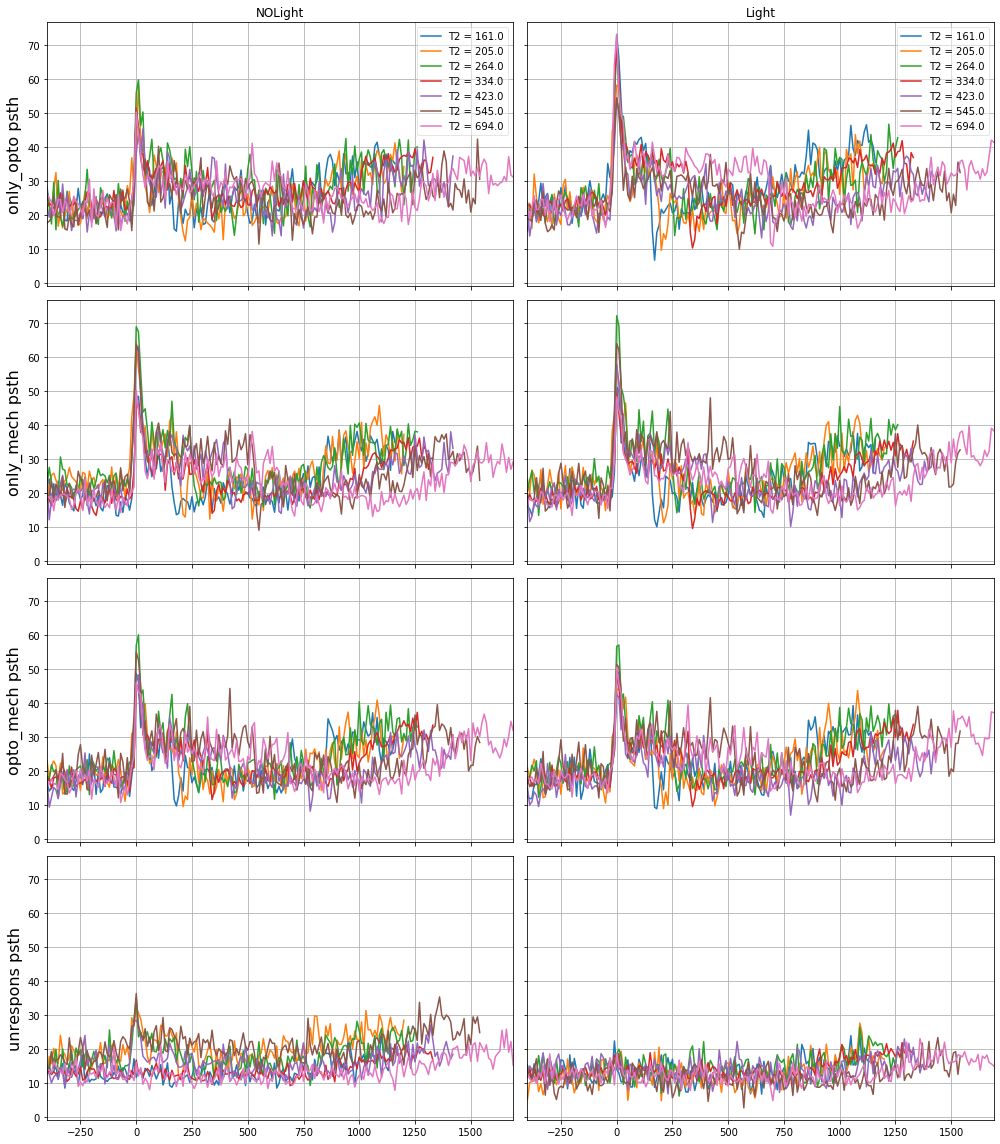

In [5]:
M = get_M(df)
t = np.arange(M, dtype=np.float) * dt - 400
gb = (df.groupby(['category', 'light', 'T2']).
         apply(lambda x: compute_mean_psth(x, M)))
fig, axs = plt.subplots(len(df.category.unique()),
                        len(df.light.unique()),
                        sharex='all',
                        sharey='all',
                        figsize=(14, 16))
category_keys = list(categories.keys())
for i, m in zip(gb.index.values, gb.values):
    row = category_keys.index(i[0])
    col = i[1]
    ax = axs[row, col]
    ax.plot(t, m, label='T2 = {}'.format(i[-1]))
    ax.autoscale(axis='x', tight='tight')
    ax.grid(True)
    if row == 0:
        ax.set_title(light_map[i[1]])
        ax.legend(loc='best', framealpha=0.5)
    if col == 0:
        ax.set_ylabel(i[0] + ' psth')
    ax.tick_params
fig.tight_layout()

In [7]:
t

array([-400., -390., -380., -370., -360., -350., -340., -330., -320.,
       -310., -300., -290., -280., -270., -260., -250., -240., -230.,
       -220., -210., -200., -190., -180., -170., -160., -150., -140.,
       -130., -120., -110., -100.,  -90.,  -80.,  -70.,  -60.,  -50.,
        -40.,  -30.,  -20.,  -10.,    0.,   10.,   20.,   30.,   40.,
         50.,   60.,   70.,   80.,   90.,  100.,  110.,  120.,  130.,
        140.,  150.,  160.,  170.,  180.,  190.,  200.,  210.,  220.,
        230.,  240.,  250.,  260.,  270.,  280.,  290.,  300.,  310.,
        320.,  330.,  340.,  350.,  360.,  370.,  380.,  390.,  400.,
        410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,  490.,
        500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,  580.,
        590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,  670.,
        680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,  760.,
        770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,  850.,
        860.,  870.,

/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


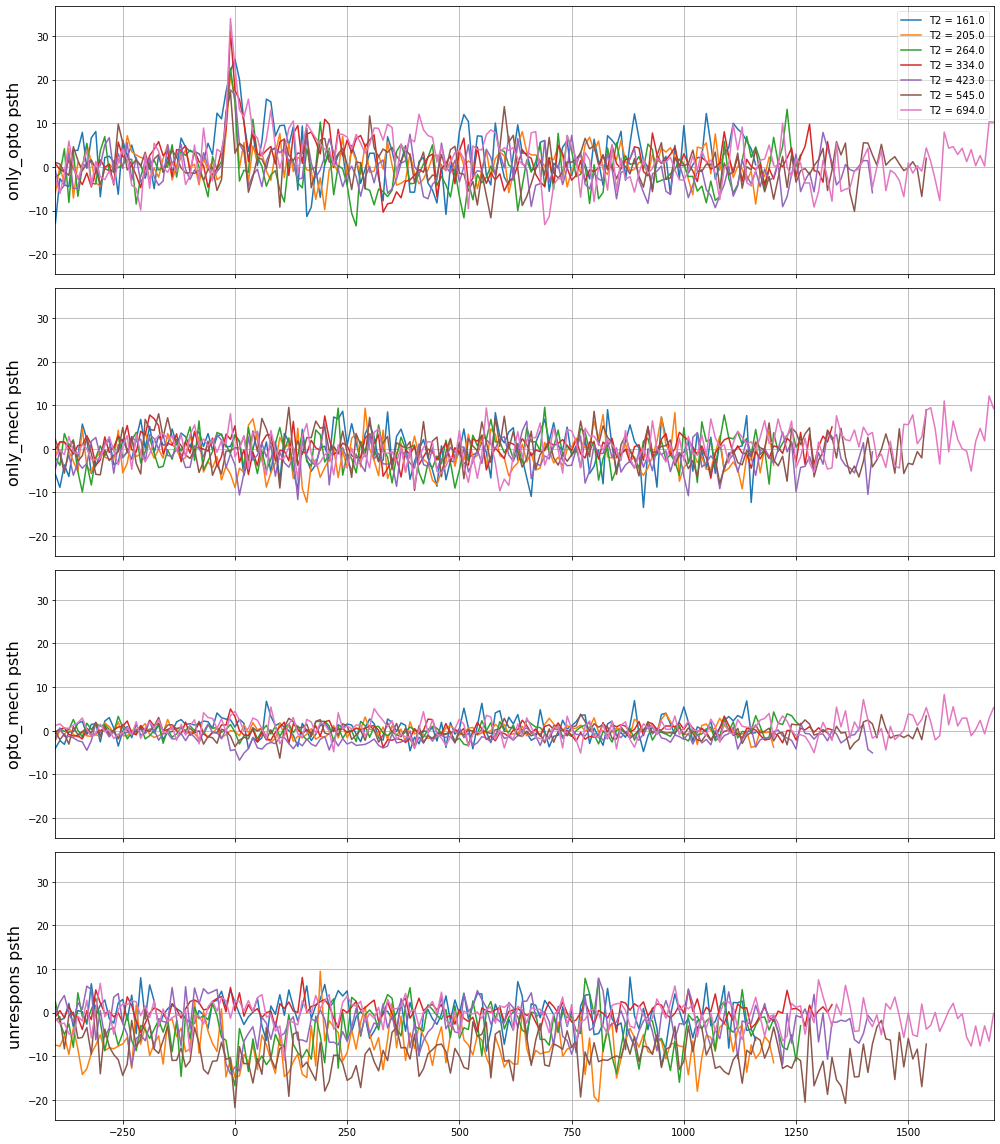

In [8]:
M = get_M(df)
t = np.arange(M, dtype=np.float) * dt - 400

def light_difference(df, M=None):
    return (compute_mean_psth(df.query('light == 1'), M) - 
            compute_mean_psth(df.query('light == 0'), M))

gb = (df.groupby(['category', 'T2']).
         apply(lambda x: light_difference(x, M)))
fig, axs = plt.subplots(len(df.category.unique()),
                        1,
                        sharex='all',
                        sharey='all',
                        figsize=(14, 16))
category_keys = list(categories.keys())
for i, m in zip(gb.index.values, gb.values):
    row = category_keys.index(i[0])
    ax = axs[row]
    ax.plot(t, m, label='T2 = {}'.format(i[-1]))
    ax.autoscale(axis='x', tight='tight')
    ax.grid(True)
    if row == 0:
        ax.legend(loc='best', framealpha=0.5)
    ax.set_ylabel(i[0] + ' psth')
    ax.tick_params
fig.tight_layout()

/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: UserWarning: This figure includes Axes that are not compa

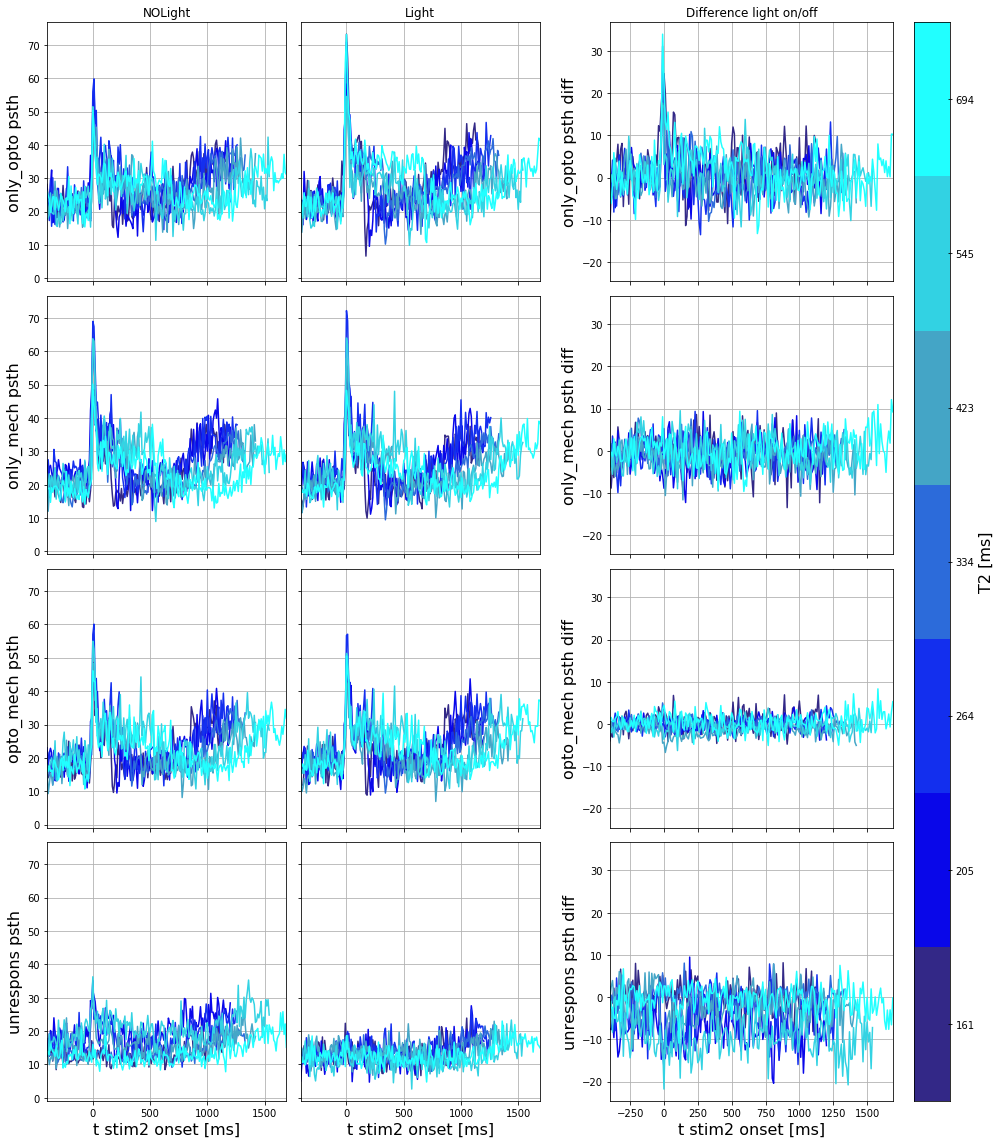

In [9]:
def frate_plotter(df, save=None, mean_op=compute_mean_psth):
    M = get_M(df)
    t = np.arange(M, dtype=np.float) * dt - 400
    category_keys = list(categories.keys())
    colors = [duration_cmap(x) for x in np.linspace(0, 1, len(T2s))]
    color_dict = {T2: color for T2, color in
                  zip(T2s, colors)}

    gb1 = (df.groupby(['category', 'light', 'T2']).
              apply(lambda x: mean_op(x, M)))
    gb2 = (df.groupby(['category', 'T2']).
              apply(lambda x: light_difference(x, M)))
    fig = plt.figure(figsize=(14, 16))
    rect1 = (0, 0, 0.55, 1)
    rect2 = (0.55, 0, 0.90, 1)
    rect3 = (0.90, 0, 1, 1)
    grid1 = plt.GridSpec(len(df.category.unique()),
                         len(df.light.unique()),
                         figure=fig,
                         left=rect1[0],
                         bottom=rect1[1],
                         right=rect1[2],
                         top=rect1[3],
                        )
    grid2 = plt.GridSpec(len(df.category.unique()),
                         1,
                         figure=fig,
                         left=rect2[0],
                         bottom=rect2[1],
                         right=rect2[2],
                         top=rect2[3],
                        )
    grid3 = plt.GridSpec(1,
                         1,
                         figure=fig,
                         left=rect3[0],
                         bottom=rect3[1],
                         right=rect3[2],
                         top=rect3[3],
                        )
    ax0 = None
    axs = np.array([[None] * grid1.get_geometry()[1]] * grid1.get_geometry()[0])
    for i, m in zip(gb1.index.values, gb1.values):
        row = category_keys.index(i[0])
        col = i[1]
        if ax0 is None:
            ax0 = ax = axs[row, col] = plt.subplot(grid1[row, col])
        else:
            if axs[row, col] is None:
                ax = axs[row, col] = plt.subplot(grid1[row, col], sharex=ax0, sharey=ax0)
            else:
                ax = axs[row, col]
        ax.plot(t, m, label='T2 = {}'.format(i[-1]),
                color=color_dict[i[-1]])
        ax.autoscale(axis='x', tight='tight')
        ax.grid(True)
        if row == 0:
            ax.set_title(light_map[i[1]])
        if col == 0:
            ax.set_ylabel(i[0] + ' psth')
        if row != grid1.get_geometry()[0] - 1:
            ax.tick_params(labelbottom=False)
        else:
            ax.set_xlabel('t stim2 onset [ms]')
        if col != 0:
            ax.tick_params(labelleft=False)
    ax0 = None
    axs = np.array([None] * grid2.get_geometry()[0])
    for i, m in zip(gb2.index.values, gb2.values):
        row = category_keys.index(i[0])
        if ax0 is None:
            ax0 = ax = axs[row] = plt.subplot(grid2[row])
        else:
            if axs[row] is None:
                ax = axs[row] = plt.subplot(grid2[row], sharex=ax0, sharey=ax0)
            else:
                ax = axs[row]
        ax.plot(t, m, label='T2 = {}'.format(i[-1]),
                color=color_dict[i[-1]])
        ax.autoscale(axis='x', tight='tight')
        ax.grid(True)
        if row == 0:
            ax.set_title('Difference light on/off')
        if row != grid1.get_geometry()[0] - 1:
            ax.tick_params(labelbottom=False)
        else:
            ax.set_xlabel('t stim2 onset [ms]')
        ax.set_ylabel(i[0] + ' psth diff')
    grid1.tight_layout(fig, rect=rect1)
    grid2.tight_layout(fig, rect=rect2)

    cbar_ax = plt.subplot(grid3[0])
    colorbar_legend(labels=['{:1.0f}'.format(T2) for T2 in T2s],
                    colors=colors,
                    cax=cbar_ax
                   )
    cbar_ax.set_ylabel('T2 [ms]')

    grid3.tight_layout(fig, rect=rect3)
    bottom = max([grid1.bottom, grid2.bottom, grid3.bottom])
    top = min([grid1.top, grid2.top, grid3.top])

    grid1.tight_layout(fig,
                       rect=[rect1[0],
                             rect1[1] + (bottom - grid1.bottom),
                             rect1[2],
                             rect1[3] + (top - grid1.top)])
    grid2.tight_layout(fig,
                       rect=[rect2[0],
                             rect2[1] + (bottom - grid2.bottom),
                             rect2[2],
                             rect2[3] + (top - grid2.top)])
    grid3.tight_layout(fig,
                       rect=[rect3[0],
                             rect3[1] + (bottom - grid3.bottom),
                             rect3[2],
                             rect3[3] + (top - grid3.top)])
    if save:
        fig.savefig(save, dpi=200, bbox_inches='tight')

frate_plotter(df, 'firing_conditions.png')

# Masking arrays

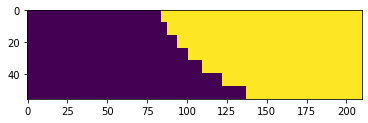

In [10]:
M = get_M(df)
t = np.arange(M, dtype=np.float) * dt - 400
mask = np.array([t > T2 + 270 for T2 in df.T2.values])
plt.imshow(mask)

def compute_masked_mean_psth(df, *args):
    p = np.ma.concatenate([p[None, :] for p in df.psth], axis=0)
    return np.ma.mean(p, axis=0)

/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/lpaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:112: UserWarning: This figure includes Axes that are not compa

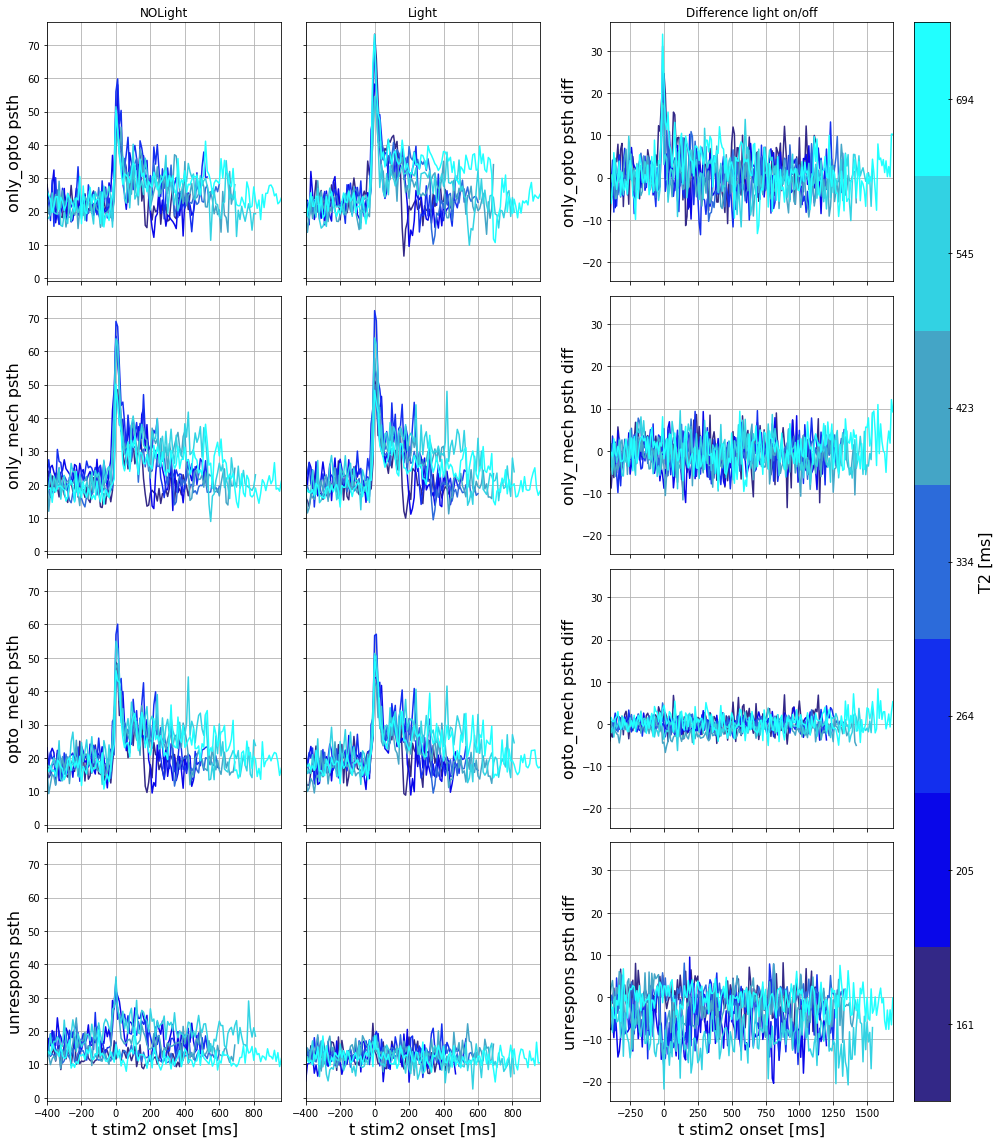

In [11]:
masked_psth = np.ma.array(np.array([pad_nan(psth, M) for psth in df.psth.values]), mask=mask)
masked_df = df.copy()
masked_df = masked_df.assign(psth=list(masked_psth))
frate_plotter(masked_df, mean_op=compute_masked_mean_psth)

---
# New data structure

### PSTH.mat

PSTH = 
  struct with fields:

                    Optoon: {1×7 cell} % each cell is ~140-150 neurons Stimulus2 PSTH in light on trials 
     Optoon_NumberofTrials: {1×7 cell} %   each cell is number of trials for a recorded neuron above 
                   Optooff: {1×7 cell} %   each cell is ~140-150 neurons Stimulus2  PSTH   in light off trials 
    Optooff_NumberofTrials: {1×7 cell}  %  each cell is number of trials for a recorded neuron above 

### resp.mat
resp = 

  struct with fields:

    Vibration: [140×1 logical] %   logical values: 1 = significant response to vibrotactile stimulus
         Otpo: [140×1 logical] %   logical values: 1 = significant response to light stimulus

These are **single** or **good multi units**

the example code will plot the mean response of all neurons for light on vs light off trials selecting neurons that response significantly different for light on vs light off condition. 

```
for i=1:7
    figure 
    plot(smooth(mean(PSTH.Optoon{i}(resp.Otpo,:))),'r')
    hold on
    plot(smooth(mean(PSTH.Optooff{i}(resp.Otpo,:))),'b')
end
```


In [12]:
raw_psth = loadmat('PSTH_v2.mat')['PSTH']
raw_resp = loadmat('resp_v2.mat')['resp']
dt = 10.
pre = 400.
delay = 500.
action = 500.

In [3]:
light_map = {0: 'Optooff',
             1: 'Optoon'}
vibration_responsive = np.squeeze(raw_resp['Vibration'][0][0])
opto_responsive = np.squeeze(raw_resp['Otpo'][0][0])
is_single_unit = np.squeeze(raw_resp['IsSingleunit'][0][0])
n_suffix = '_NumberofTrials'
T1 = 334.
T2s = np.array([161.0,
                205.0,
                264.0,
                334.0,
                423.0,
                545.0,
                694.0])
data = []
for light, label in light_map.items():
    frate = raw_psth[label][0][0]
    ntrials = raw_psth[label + n_suffix][0][0]
    for c, T2 in enumerate(T2s):
        temp1 = frate[0][c]
        temp2 = ntrials[0][c]
        for nid, (rate, n, vresp, oreps, sing) in enumerate(zip(temp1,
                                                                temp2,
                                                                vibration_responsive,
                                                                opto_responsive,
                                                                is_single_unit)):
            n = n[0]
            if n > 0:
                psth = np.round(rate * n *1e-3)
                data.append([nid, vresp, oreps, sing, T1, T2, light, n, psth])
columns = ['nid', 'mech_resp', 'opto_resp', 'single_unit',
           'T1', 'T2', 'light', 'ntrials', 'psth']
df = pd.DataFrame(data=data,
                  columns=columns)
df

,nid,mech_resp,opto_resp,single_unit,T1,T2,light,ntrials,psth
0,0,0,1,0,334.0,161.0,0,9,"[6.0, 8.0, 6.0, 7.0, 13.0, 4.0, 5.0, 7.0, 11.0..."
1,1,0,1,0,334.0,161.0,0,9,"[0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 2.0, 0.0, 1.0, ..."
2,2,0,1,0,334.0,161.0,0,9,"[1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 1.0, ..."
3,3,0,1,1,334.0,161.0,0,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
4,4,0,1,0,334.0,161.0,0,9,"[14.0, 13.0, 19.0, 14.0, 15.0, 18.0, 11.0, 12...."
...,...,...,...,...,...,...,...,...,...
2985,235,1,0,0,334.0,694.0,1,11,"[3.0, 1.0, 3.0, 3.0, 2.0, 2.0, 4.0, 1.0, 3.0, ..."
2986,236,0,1,0,334.0,694.0,1,11,"[1.0, 5.0, 1.0, 1.0, 1.0, 4.0, 5.0, 0.0, 1.0, ..."
2987,237,0,0,0,334.0,694.0,1,11,"[3.0, 2.0, 1.0, 3.0, 4.0, 3.0, 1.0, 1.0, 1.0, ..."
2988,238,0,1,0,334.0,694.0,1,11,"[1.0, 2.0, 0.0, 2.0, 0.0, 3.0, 4.0, 2.0, 2.0, ..."


In [12]:
len(df.query('mech_resp == 0 and opto_resp == 0').nid.unique())

110

In [13]:
mr = {}
# df = df.query('single_unit == 1')
for (nid, T2), temp in df.groupby(['nid', 'T2']):
    n = temp.ntrials.values[:, None].astype(np.float).copy()
    n[n == 0] = np.nan
    mr[nid, T2] = np.nansum(np.array([r for r in temp.psth], dtype=np.float), axis=0) / np.nansum(n) *1e3 / dt

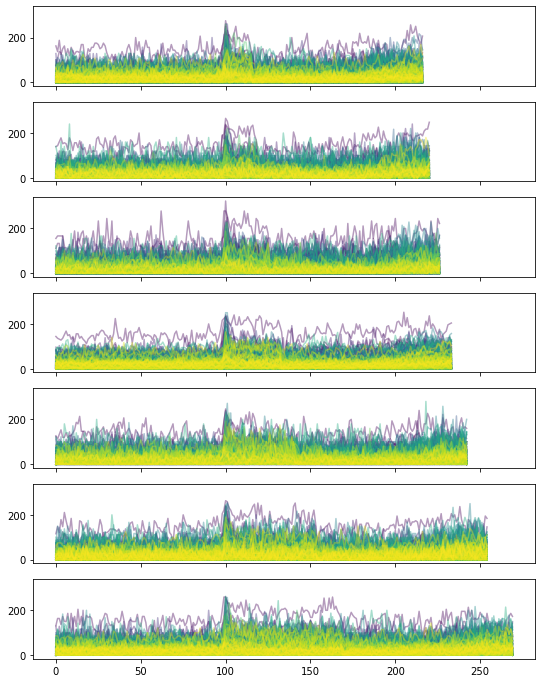

In [14]:
fig, axs = plt.subplots(len(T2s), 1, figsize=(9, 12), sharex=True, sharey=True)
colors = {nid: plt.get_cmap('viridis')(x)
          for x, nid in zip(np.linspace(0, 1, len(df.nid.unique())),
                       sorted(df.nid.unique()))}
for (nid, T2), val in mr.items():
    ax = axs[T2s == T2][0]
    color = colors[nid]
    ax.plot(val, color=color, alpha=0.4)

In [15]:
def get_M(df):
    return max((len(p) for p in df.psth))

def pad_nan(x, M):
    output = np.nan * np.ones(M)
    output[:len(x)] = x
    return output

def get_t(M):
    return np.arange(M, dtype=np.float) * dt - pre

def mask_psth(df, offset=270):
    M = get_M(df)
    t = get_t(M)
    mask = np.array([t > T2 + offset for T2 in df.T2.values])
    masked_psth = np.ma.array(np.array([pad_nan(psth, M)
                                        for psth in df.psth.values]),
                              mask=mask)
    out = df.copy()
    return out.assign(psth=list(masked_psth))

masked_df = mask_psth(df)

mr = {}
for (nid, T2), temp in masked_df.groupby(['nid', 'T2']):
    mr[nid, T2] = np.ma.sum(temp.psth) / temp.ntrials.sum() *1e3 / dt

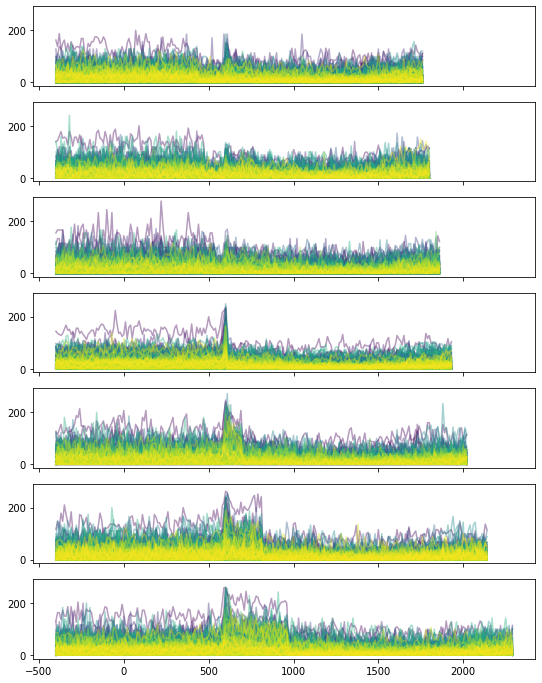

In [16]:
fig, axs = plt.subplots(len(T2s), 1, figsize=(9, 12), sharex=True, sharey=True)
colors = {nid: plt.get_cmap('viridis')(x)
          for x, nid in zip(np.linspace(0, 1, len(df.nid.unique())),
                       sorted(df.nid.unique()))}
for (nid, T2), val in mr.items():
    ax = axs[T2s == T2][0]
    color = colors[nid]
    ax.plot(get_t(len(val)), val, color=color, alpha=0.4)

Text(0.5, 1.0, 'Multiunits units')

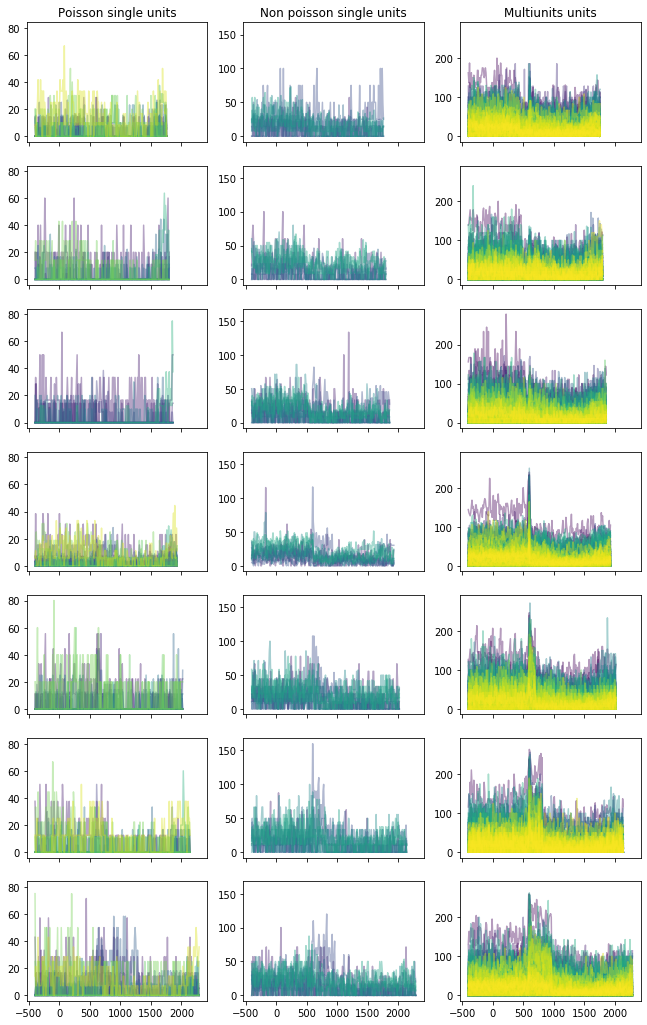

In [17]:
def get_pre_stats(df):
    t = get_t(len(df.psth.values[0]))
    h = np.array([h[t < -10] for h in df.psth.values])
    m = np.mean(h)
    v = np.var(h)
    n = np.sum(h)
    fano = v / m
    return pd.Series([m, v, n, fano],
                     index=['mean_psth',
                            'var_psth',
                            'spike_count',
                            'fano_factor'])

def single_unit_pre_stats(masked_df):
    return get_pre_stats(masked_df.query('single_unit == 1'))

stats = masked_df.query('single_unit == 1').groupby('nid').apply(get_pre_stats)
strange_nids = [nid for nid, f in stats.fano_factor.items() if f > 1.2]
poisson_nids = [nid for nid, f in stats.fano_factor.items() if f <= 1.2]

fig, axs = plt.subplots(len(T2s), 3, figsize=(11, 18), sharex=True, sharey='col')
colors = {nid: plt.get_cmap('viridis')(x)
          for x, nid in zip(np.linspace(0, 1, len(df.nid.unique())),
                       sorted(df.nid.unique()))}
for (nid, T2), val in mr.items():
    if nid in poisson_nids:
        col = 0
    elif nid in strange_nids:
        col = 1
    else:
        col = 2
    ax = axs[T2s == T2, col][0]
    color = colors[nid]
    ax.plot(get_t(len(val)), val, color=color, alpha=0.4)
axs[0, 0].set_title('Poisson single units')
axs[0, 1].set_title('Non poisson single units')
axs[0, 2].set_title('Multiunits units')

In [18]:
len(strange_nids) / (len(strange_nids) + len(poisson_nids))

0.3448275862068966

## Maybe use xarray
`xarray` allows us to store multidimensional data in `DataFrame`like entities called `Dataset`s. We could potentially use these to remove the need for an object `dtype` in the `psth` column

In [19]:
import xarray

In [22]:
ds = xarray.Dataset.from_dataframe(masked_df)
ds

<xarray.Dataset>
Dimensions:      (index: 2990)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 6 ... 2984 2985 2986 2987 2988 2989
Data variables:
    nid          (index) int64 0 1 2 3 4 5 6 7 ... 233 234 235 236 237 238 239
    mech_resp    (index) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 1 0 1 1 0 0 0 0
    opto_resp    (index) int64 1 1 1 1 1 0 1 1 1 1 0 1 ... 1 1 0 1 0 0 0 1 0 1 1
    single_unit  (index) int64 0 0 0 1 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    T1           (index) float64 334.0 334.0 334.0 334.0 ... 334.0 334.0 334.0
    T2           (index) float64 161.0 161.0 161.0 161.0 ... 694.0 694.0 694.0
    light        (index) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
    ntrials      (index) int64 9 9 9 9 9 9 9 9 13 ... 11 11 11 11 11 11 11 11 20
    psth         (index) object [6.0 8.0 6.0 7.0 13.0 4.0 5.0 7.0 11.0 10.0 5.0 4.0 4.0 4.0 7.0 10.0 5.0
 9.0 7.0 7.0 5.0 7.0 9.0 8.0 7.0 8.0 7.0 5.0 8.0 7.0 6.0 3.0 4.0 6.0 5.0
 8.0 7.0 6.0 4.0 7.0 6.0

In [23]:
ds2 = xarray.Dataset.from_dataframe(df)
ds2

<xarray.Dataset>
Dimensions:      (index: 2990)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 6 ... 2984 2985 2986 2987 2988 2989
Data variables:
    nid          (index) int64 0 1 2 3 4 5 6 7 ... 233 234 235 236 237 238 239
    mech_resp    (index) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 1 0 1 1 0 0 0 0
    opto_resp    (index) int64 1 1 1 1 1 0 1 1 1 1 0 1 ... 1 1 0 1 0 0 0 1 0 1 1
    single_unit  (index) int64 0 0 0 1 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    T1           (index) float64 334.0 334.0 334.0 334.0 ... 334.0 334.0 334.0
    T2           (index) float64 161.0 161.0 161.0 161.0 ... 694.0 694.0 694.0
    light        (index) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
    ntrials      (index) int64 9 9 9 9 9 9 9 9 13 ... 11 11 11 11 11 11 11 11 20
    psth         (index) object [ 6.  8.  6.  7. 13.  4.  5.  7. 11. 10.  5.  4.  4.  4.  7. 10.  5.  9.
  7.  7.  5.  7.  9.  8.  7.  8.  7.  5.  8.  7.  6.  3.  4.  6.  5.  8.
  7.  6.  4.  7.  6.  7.